<div style="background-color:	#103060; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white">Data III, Pokemon opdracht </h1>
<b style="color:white">Rogier Gernaat</b>
    </div>

<a name='start'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px"> <h2 style="color:white"><strong>Intro stuk Rogier, Work in Progress</strong></h2> </div>
Pokémon VGC Meta-analyse voor het voorspellende model
Projectdoel
In dit deel van het project richten we ons op het verzamelen en analyseren van gegevens over competitieve Pokémon Video Game Championships (VGC) om inzicht te krijgen in de huidige "meta" – de populaire en succesvolle teamcomposities binnen deze competitie. We gaan data van de website Limitless VGC verzamelen, waaronder informatie over de teamsamenstellingen, de gebruikte items, en de Pokémon-typen van succesvolle spelers. Door deze data op te splitsen in overzichtelijke dataframes, maken we het eenvoudiger om analyses uit te voeren en uiteindelijk een voorspellend model te bouwen.

Data Scraping
We scrapen eerst de algemene teamgegevens (zoals toernooi, ranking, team samenstelling, speler, etc.) en slaan deze op in één dataframe. In een tweede stap verzamelen we per team de gedetailleerde data per Pokémon: de moves, het item, de ability's, de tera type én de positie (pokemon_slot) waarin de Pokémon staat. Deze extra informatie geeft ons een compleet beeld van hoe teams zijn opgebouwd.

Data Analyse en Exploratie
Met de gestructureerde data gaan we patronen en trends ontdekken. We zoeken naar populaire teamcombinaties, vaak gebruikte items en moves, en sterke synergiën tussen de Pokémon. Dit helpt ons te begrijpen welke strategieën succesvol zijn in de VGC-competitie.

Mijn taak in dit project
Mijn taak omvat het opzetten van de scraping-pijplijn, het structureren van de verzamelde data in overzichtelijke dataframes en het voorbereiden van de data voor de verdere analyse en modelbouw. Door deze aanpak kunnen we inzichten verkrijgen die competitieve spelers helpen hun teams te optimaliseren.

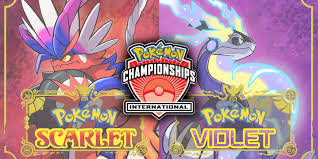

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>De ethische kant</strong> </div>
Bij het webscrapen is het niet alleen belangrijk om technisch werkende scripts te schrijven, maar ook om stil te staan bij de ethische aspecten van het scrapen. Vrijwel elke website heeft een robots.txt-pagina, die je kunt bereiken door achter de website-URL “/robots.txt” te plakken (bijvoorbeeld: https://limitlessvgc.com/robots.txt).

#### Wat is robots.txt?
Dit bestand geeft richtlijnen over welke delen van de website wel en niet benaderd mogen worden door webcrawlers of scrapers. Het fungeert als een soort “verkeersbord” voor bots: bepaalde directories zoals /wp-admin/ of andere gevoelige gebieden worden vaak expliciet uitgesloten. Het doel is om te voorkomen dat bots per ongeluk toegang krijgen tot admin-gebieden of andere gevoelige data, wat de veiligheid en prestaties van de website ten goede komt.

#### Waarom is dit belangrijk?

- Respect voor de website: Door de instructies in de robots.txt te respecteren, laat je zien dat je de wensen van de website-eigenaar respecteert. Dit helpt om een goede relatie te behouden en voorkomt onnodige belasting van de server.
- Veiligheid en privacy: Sommige delen van een website, zoals beheerderspagina’s of persoonlijke data, worden uitgesloten om de privacy en veiligheid van gebruikers te waarborgen. Het is dan ook belangrijk om geen gegevens te scrapen uit deze gebieden.
- Juridische en ethische overwegingen: Hoewel de regels in robots.txt niet per se juridisch bindend zijn, worden ze wel gezien als een indicatie van wat de website-eigenaar toelaat. Het negeren van deze regels kan leiden tot juridische problemen of reputatieschade, zeker als de data later publiek gebruikt of verspreid wordt.

#### Mogen wij scrapen?
In het geval van de website Limitless VGC, staat in de robots.txt aangegeven dat je in principe toegang hebt tot de meeste delen van de website, behalve naar pagina’s waar beheerdersinformatie of andere gevoelige data staan, zoals /wp-admin/. Dit betekent dat je in jouw scraping-project veilig de publieke data kunt verzamelen, zolang je de uitgesloten paden vermijdt en de server niet overbelast met te frequente verzoeken.

Kortom, zorg er altijd voor dat je je aan deze richtlijnen houdt. Niet alleen om mogelijke juridische problemen te voorkomen, maar ook omdat het simpelweg netjes is tegenover de website-eigenaren. Dit maakt deel uit van een verantwoorde en ethische benadering van webscrapen.

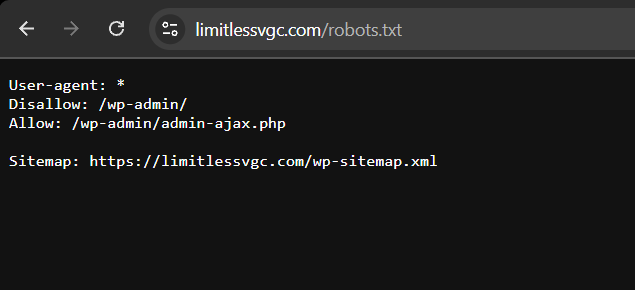

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Start Code</strong></h2>
</div>


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Mogelijke pip installs</strong>
</div>




In [1]:
#
#
#

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Inladen van modules en library's</strong>
</div>




In [2]:
# Web scraping
import requests
from bs4 import BeautifulSoup
import scrapy
from urllib.parse import urljoin
import uuid
import re

# Data processing and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Class bouwen voor het extraheren van de toernooi data</strong>
</div>




In [3]:
class LimitlessVGCScraper:
    """
    Scraper om Pokémon teamdata te extraheren van de Limitless VGC website.
    
    Dit script doorloopt alle pagina's met teams en haalt per team de gegevens op zoals:
    - Toernooi naam
    - Plaats (ranking)
    - Team (de 6 Pokémon, aangevuld met None als er minder dan 6 zijn)
    - Speler naam
    - Teamlink (waar je meer details over het team vindt)
    - Team_id, wat nu gewoon het laatste nummer is uit de teamlink (dus '319' als de link '/teams/319' is)
    """
    
    def __init__(self, base_url, total_pages):
        """
        Initialiseert de scraper.
        
        Parameters:
        - base_url (str): De basis-URL waar de teams te vinden zijn. Bijvoorbeeld "https://limitlessvgc.com/teams?pg=".
        - total_pages (int): Het aantal pagina's dat gescraped moet worden.
        """
        self.base_url = base_url
        self.total_pages = total_pages
        self.data = []  # Hier bewaren we alle data die we gaan scrapen

    def scrape(self):
        """
        Loopt door alle pagina's en haalt de HTML-content op.
        Voor elke pagina wordt de inhoud geparsed en worden de teamgegevens eruit gehaald.
        """
        for page in range(1, self.total_pages + 1):
            url = f"{self.base_url}{page}"
            try:
                response = requests.get(url)
                response.raise_for_status()  # Check of de request goed is verlopen
                self.parse_page(response.text)
            except requests.RequestException as e:
                print(f"Er is een fout opgetreden bij het ophalen van pagina {page}: {e}")
                continue  # Ga verder met de volgende pagina

    def parse_page(self, html_content):
        """
        Parse de HTML-content van een pagina en zoekt de tabel met teamgegevens.
        
        Parameters:
        - html_content (str): De HTML-code van de pagina.
        """
        soup = BeautifulSoup(html_content, 'html.parser')
        table = soup.find('table', class_='table')
        if not table:
            return

        current_tournament = None  # Houdt bij welk toernooi we op dat moment verwerken
        
        # Loop door alle rijen in de tabel
        for row in table.find_all('tr'):
            header = row.find('th', class_='table-sub-heading')
            if header:
                # Als we een header tegenkomen, is dit de naam van het toernooi
                current_tournament = header.text.strip()
            else:
                self.parse_row(row, current_tournament)

    def parse_row(self, row, tournament):
        """
        Extraheert de data uit een enkele rij van de teamtabel.
        
        Parameters:
        - row: De HTML-rij met de teamgegevens.
        - tournament (str): De naam van het toernooi, zodat we dit meegeven aan het team.
        """
        columns = row.find_all('td')
        if len(columns) != 3:
            return  # Deze rij heeft niet de verwachte structuur; overslaan
        
        place = columns[0].text.strip()
        player_name = columns[2].text.strip()
        team = self.extract_team(columns[1])
        team += [None] * (6 - len(team))  # Zorg ervoor dat er altijd 6 items in de teamlijst zitten

        # Haal de teamlink op uit de kolom met teaminformatie
        team_link_tag = columns[1].find('a', class_='team-link')
        if team_link_tag and 'href' in team_link_tag.attrs:
            team_link = urljoin('https://limitlessvgc.com', team_link_tag['href'])
        else:
            team_link = None

        # In plaats van een random gegenereerde team_id te maken, halen we nu het laatste nummer uit de teamlink.
        # Bijvoorbeeld, als team_link 'https://limitlessvgc.com/teams/319' is, dan wordt team_id '319'.
        team_id = None
        if team_link:
            match = re.search(r'/teams/(\d+)', team_link)
            if match:
                team_id = match.group(1)

        # Voeg alle verzamelde gegevens toe aan onze data-lijst.
        # De volgorde is: toernooi, plaats, 6 Pokémon, spelernaam, teamlink en team_id.
        self.data.append([tournament, place] + team[:6] + [player_name, team_link, team_id])

    def extract_team(self, team_column):
        """
        Extraheert de namen van de Pokémon uit de image links in de teamkolom.
        
        Parameters:
        - team_column: De HTML-kolom met de teaminformatie.
        
        Returns:
        - Een lijst met de namen van de Pokémon, verkregen uit de bestandsnamen van de img-tags.
        """
        team_div = team_column.find('div', class_='vgc-team')
        if not team_div:
            return []

        team = []
        # Loop door alle spans die de Pokémon bevatten
        for span in team_div.find_all('span', class_='tt'):
            img = span.find('img')
            if img and img.get('src'):
                # De bestandsnaam (zonder extensie) is de naam van de Pokémon, bv. 'garchomp.png'
                name = img['src'].split('/')[-1].split('.')[0]
                team.append(name)
            else:
                team.append(None)
        return team

    def to_dataframe(self):
        """
        Zet de gescrapete data om in een pandas DataFrame.
        
        Returns:
        - Een DataFrame met de volgende kolommen:
          'tournament', 'place', 'pokemon_1', 'pokemon_2', 'pokemon_3', 
          'pokemon_4', 'pokemon_5', 'pokemon_6', 'player_name', 'team_link', 'team_id'
        """
        columns = [
            'tournament', 'place',
            'pokemon_1', 'pokemon_2', 'pokemon_3',
            'pokemon_4', 'pokemon_5', 'pokemon_6',
            'player_name', 'team_link', 'team_id'
        ]
        return pd.DataFrame(self.data, columns=columns)

#Gebruiken van de scraper
if __name__ == "__main__":
    scraper = LimitlessVGCScraper("https://limitlessvgc.com/teams?pg=", 25)
    
    # Start het scrapen van de data
    scraper.scrape()
    
    # Converteer de verzamelde data naar een pandas DataFrame
    df = scraper.to_dataframe()


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Toelichting tot de Code</strong>
</div>
Dit script automatiseerd het process van het verzamelen van competitieve Pokémon-team gegevens van de Limitless VGC-website. Dit is een soort van stap 1 van dit deel, we zijn van plan de rest van de data die we kunnen scrapen op te delen in 1 of meer verschillende dataframes omdat dit zorgt voor een betere overzichtelijkheid van data. Het dataframe dat we hierna gaan bouwen is de extra data die de website te bieden heeft per pokemon, deze data bevat bijvoorbeeld de moves van de pokemon en het item dat de pokemon vasthoudt. We scrapen nu pagina's 1 tot 25 sinds dit alleen de data bevat van de pokemon versie "Scarlet en Violet"

Een probleem waar we eerst tegen aan liepen tijden het ophalen van de data was dat de 'data-original-title' attributen, die de namen van de Pokémon bevatten, niet beschikbaar waren omdat ze dynamisch via JavaScript worden geladen, dit komt denk ik omdat er ook een link zit vastgeplakt aan de teams om de meer gedetaileerde informatie te krijgen per pokemon. Aangezien de 'requests' bibliotheek geen JavaScript uitvoert, konden we deze gegevens niet ophalen. Om dit op te lossen, hebben we de Pokémon-namen geëxtraheerd uit de 'src' attributen van de 'img' tags binnen elk Pokémon-item. De bestandsnamen van deze afbeeldingen bevatten namelijk de namen van de Pokémon. Door de bestandsnamen te parseren, konden we de namen verkrijgen en het script laten werken zoals bedoeld.

Wat is nog een valkuil aan de code?

Ik heb het nog niet werkend gekregen om ervoor te zorgen dat het script weet hoeveel pagina's er zijn, dus stel je voor ze voegen later meer data toe en dit zal ervoor zorgen dat er meer pagina's komen moet je handmatig het aantal pagina's aanpassen. Dit is echter niet echt een probleem sinds we niet persé streven naar volledige automatisering

In [4]:
df


,tournament,place,pokemon_1,pokemon_2,pokemon_3,pokemon_4,pokemon_5,pokemon_6,player_name,team_link,team_id
0,"28th September 2024 - Regional Joinville, Brazil",1st,garchomp,dragonite,amoonguss,incineroar,ninetales-alola,kingambit,Gabriel Agati,https://limitlessvgc.com/teams/319,319
1,"28th September 2024 - Regional Joinville, Brazil",2nd,dragonite,ninetales-alola,amoonguss,garchomp,incineroar,kingambit,Sebastian Escalante,https://limitlessvgc.com/teams/421,421
2,"28th September 2024 - Regional Joinville, Brazil",3rd,gastrodon,maushold,volcarona,sneasler,kingambit,baxcalibur,Juan Salerno,https://limitlessvgc.com/teams/422,422
3,"28th September 2024 - Regional Joinville, Brazil",4th,primarina,vivillon,porygon2,garchomp,gholdengo,incineroar,Luiz Lima,https://limitlessvgc.com/teams/423,423
4,"28th September 2024 - Regional Joinville, Brazil",5th,annihilape,basculegion,archaludon,amoonguss,pelipper,maushold,João Gonçalves,https://limitlessvgc.com/teams/424,424
...,...,...,...,...,...,...,...,...,...,...,...
620,"7th January 2023 - Regional San Diego, USA",24th,sylveon,annihilape,armarouge,talonflame,maushold,meowscarada,Dawei Si,https://limitlessvgc.com/teams/275,275
621,"7th January 2023 - Regional San Diego, USA",25th,salamence,gholdengo,armarouge,indeedee-f,skeledirge,breloom,Nathan Ortiz,https://limitlessvgc.com/teams/276,276
622,"7th January 2023 - Regional San Diego, USA",26th,hydreigon,annihilape,arcanine,maushold,rotom-wash,amoonguss,Joshua Lorcy,https://limitlessvgc.com/teams/277,277
623,"7th January 2023 - Regional San Diego, USA",27th,azumarill,gholdengo,dragonite,maushold,skeledirge,meowscarada,Jonathan Zuniga,https://limitlessvgc.com/teams/278,278


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Mogelijk stukje visualisaties?</strong></h2>
</div>


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Visualisatie om te kijken naar wat de meest gebruikte pokemons zijn in de VGC</strong>
</div>

c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


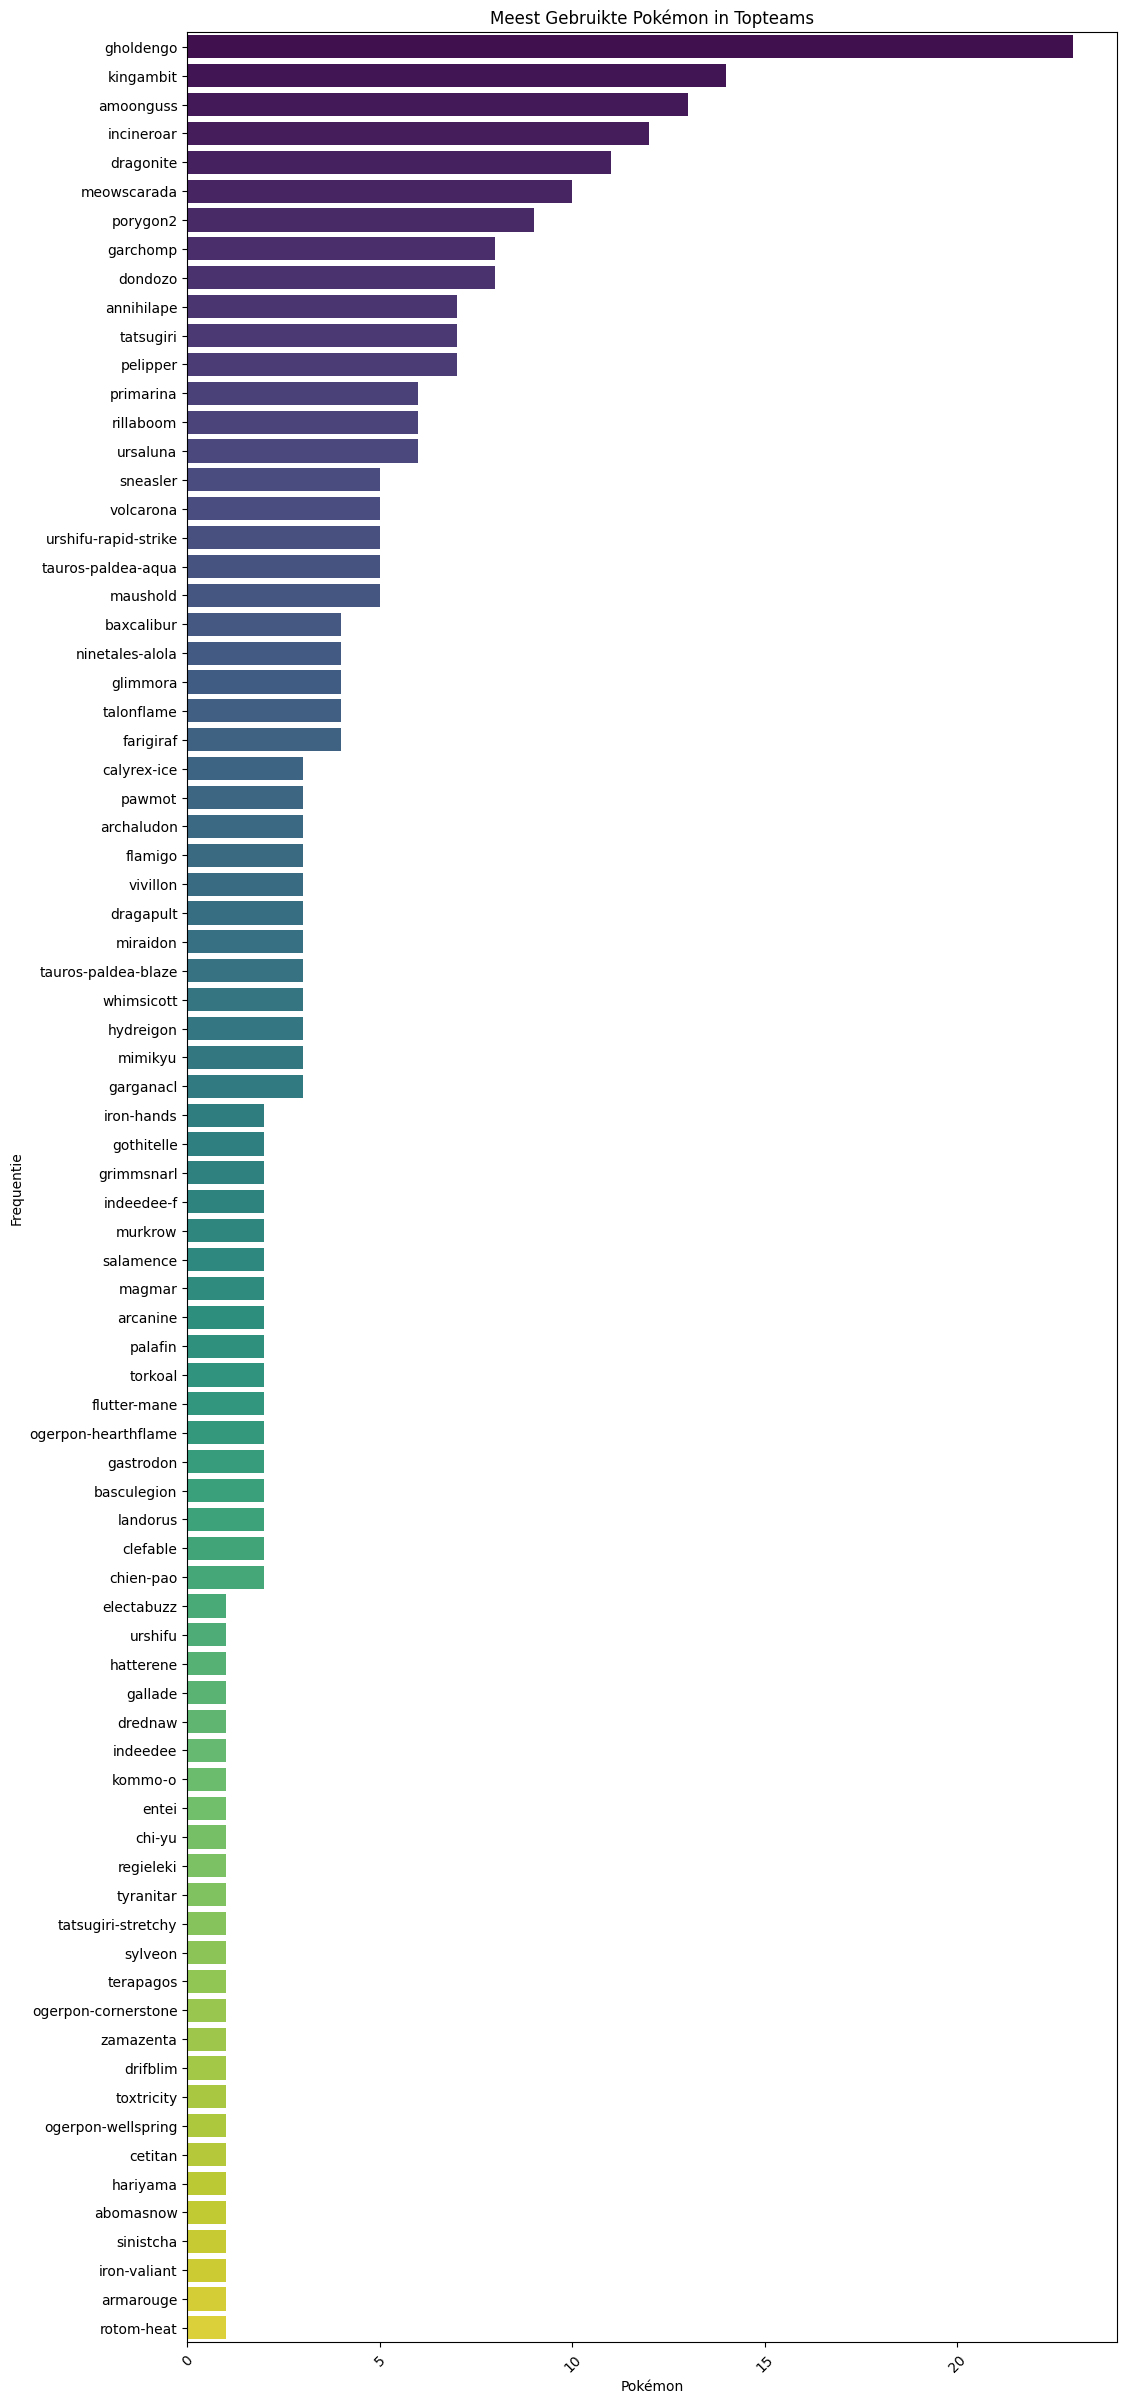

In [5]:
# Zet de data om van brede naar lange vorm
melted_df = df.melt(id_vars=['tournament', 'place', 'player_name'],
                    value_vars=['pokemon_1', 'pokemon_2', 'pokemon_3', 'pokemon_4', 'pokemon_5', 'pokemon_6'],
                    var_name='team_slot', value_name='pokemon')

# Filter de topteams (bijv. top 8)
top_places = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th']
top_teams = melted_df[melted_df['place'].isin(top_places)]

# Bereken de frequentie van elke Pokémon in de topteams
top_pokemon_counts = top_teams['pokemon'].value_counts()

# Visualiseer de meest gebruikte Pokémon in topteams
plt.figure(figsize=(12, 30))
sns.barplot(y=top_pokemon_counts.index, x=top_pokemon_counts.values, palette='viridis')
plt.title('Meest Gebruikte Pokémon in Topteams')
plt.xlabel('Pokémon')
plt.ylabel('Frequentie')
plt.xticks(rotation=45)
plt.show()


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Mogelijkheid van visualisatie na het mergen van de databronnen</strong>
</div>
Hier kunnen we dus bijvoorbeeld de data die we van een andere databron halen, zeg bijvoorbeeld de API. Gebruiken om visualisaties zoals dit te maken, dit is niet een accurate tabel meer een voorbeeld om te laten zien wat we kunnen doen

c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


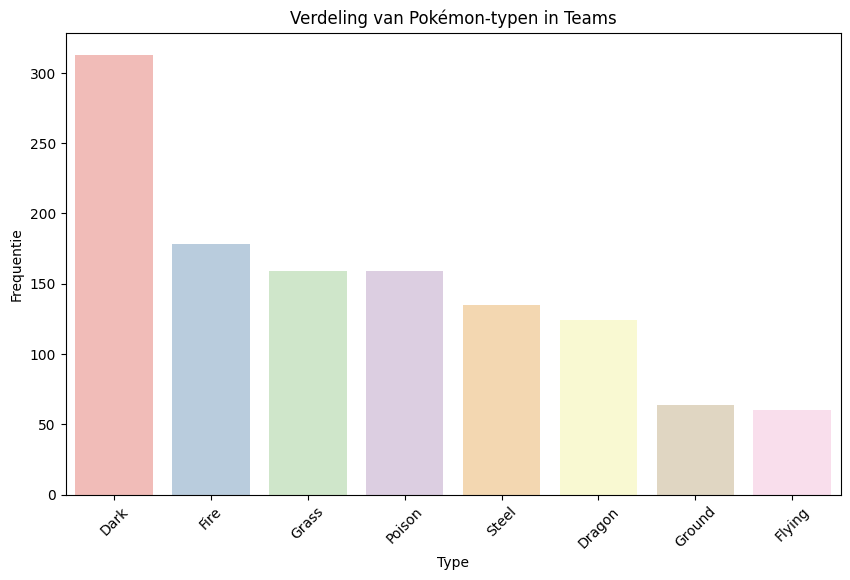

In [6]:
# Voorbeeld DataFrame met Pokémon-typen
pokemon_types = pd.DataFrame({
    'pokemon': ['garchomp', 'dragonite', 'amoonguss', 'incineroar', 'kingambit'],
    'type': ['Dragon/Ground', 'Dragon/Flying', 'Grass/Poison', 'Fire/Dark', 'Dark/Steel']
    # Voeg hier alle benodigde Pokémon en hun typen toe
})

# Zet data om naar lange vorm
melted_df = df.melt(id_vars=['tournament', 'place', 'player_name'],
                    value_vars=[f'pokemon_{i}' for i in range(1,7)],
                    var_name='team_slot', value_name='pokemon')

# Voeg typen toe aan de Pokémon
melted_df = melted_df.merge(pokemon_types, on='pokemon', how='left')

# Splits typen bij '/'
melted_df['type'] = melted_df['type'].str.split('/')

# Explodeer de typen
type_df = melted_df.explode('type')

# Bereken de frequentie van elk type
type_counts = type_df['type'].value_counts()

# Visualiseer de verdeling van typen
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Pastel1')
plt.title('Verdeling van Pokémon-typen in Teams')
plt.xlabel('Type')
plt.ylabel('Frequentie')
plt.xticks(rotation=45)
plt.show()


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Scrapen van de Detail pagina per team</strong></h2>
</div>


In [7]:
class TeamDetailScraper:
    """
    Scraper voor het extraheren van Pokémon details (moves, items, etc.) per teampagina.
    
    Deze klasse haalt de detailpagina van een team op en extraheert voor elke Pokémon:
      - De Pokémon naam en de link naar de Pokémon detailpagina.
      - De details zoals item, ability en tera type.
      - De moves (maximaal 4, aangevuld met None als er minder moves zijn).
      - De pokemon_slot: de volgorde waarin de Pokémon op de teampagina staat, wat handig kan zijn voor
        het opbouwen van een optimaal team.
        
    Verder wordt er vanuit gegaan dat de team_id als cijfers in de team_link staat. Dus als de team_link
    bijvoorbeeld 'https://limitlessvgc.com/teams/319' is, dan is de team_id '319'.
    """
    
    def __init__(self, base_url="https://limitlessvgc.com"):
        """
        Initialiseert de TeamDetailScraper.
        
        Parameters:
            base_url (str): De basis-URL van de website. Standaard staat deze op "https://limitlessvgc.com".
        """
        self.base_url = base_url
        self.data = []  # Hier slaan we de gescrapete Pokémon details op

    def scrape_team(self, team_link, team_id, player_name=None, tournament=None):
        """
        Haalt de teampagina op en extraheert per Pokémon de gewenste details.
        
        Parameters:
            team_link (str): De URL van de teampagina.
            team_id (str): De unieke ID van het team, zoals overgenomen uit de team_link (dus de cijfers).
            player_name (str): (Optioneel) Naam van de speler.
            tournament (str): (Optioneel) Naam van het toernooi.
        """
        try:
            response = requests.get(team_link)
            response.raise_for_status()  # Check of de request succesvol is
        except requests.RequestException as e:
            print(f"Fout bij het ophalen van {team_link}: {e}")
            return  # Ga verder met de volgende team_link als er een fout optreedt
        
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Zoek alle entries van Pokémon op de teampagina.
        team_entries = soup.find_all("div", class_="teamsheet-entry")
        if not team_entries:
            print(f"Geen Pokémon entries gevonden op {team_link}")
        
        # Doorloop alle gevonden Pokémon entries en noteer hun positie (pokemon_slot)
        for slot, entry in enumerate(team_entries, start=1):
            # --- Pokémon naam en link ---
            name_div = entry.find("div", class_="teamsheet-pokemon-name")
            if name_div:
                # De <a>-tag bevat de naam van de Pokémon, bijvoorbeeld "Garchomp"
                a_tag = name_div.find("a", class_="pokemon-link")
                if a_tag:
                    pokemon_name = a_tag.text.strip()
                    pokemon_link = urljoin(self.base_url, a_tag.get("href", ""))
                else:
                    pokemon_name = None
                    pokemon_link = None
            else:
                pokemon_name = None
                pokemon_link = None

            # --- Pokémon details: item, ability en tera type ---
            details_div = entry.find("div", class_="teamsheet-pokemon-details")
            if details_div:
                p_tags = details_div.find_all("p")
                # Eerste <p> bevat het item (bijv. "Choice Band")
                if len(p_tags) >= 1:
                    try:
                        item = p_tags[0].contents[0].strip()
                    except Exception:
                        item = None
                else:
                    item = None

                # Tweede <p> bevat de ability (bijv. "Ability: Rough Skin")
                if len(p_tags) >= 2:
                    ability_text = p_tags[1].text.strip()
                    ability = ability_text[len("Ability:"):].strip() if ability_text.lower().startswith("ability:") else ability_text
                else:
                    ability = None

                # Derde <p> bevat de tera type (bijv. "Tera Type: Steel")
                if len(p_tags) >= 3:
                    tera_text = p_tags[2].text.strip()
                    tera_type = tera_text[len("Tera Type:"):].strip() if tera_text.lower().startswith("tera type:") else tera_text
                else:
                    tera_type = None
            else:
                item = ability = tera_type = None

            # --- Pokémon moves ---
            moves_div = entry.find("div", class_="teamsheet-attacks")
            moves = []
            if moves_div:
                # Iedere <p> bevat één move
                for p in moves_div.find_all("p"):
                    move = p.text.strip()
                    if move:
                        moves.append(move)
            # Zorg ervoor dat er altijd 4 moves worden opgeslagen, vul aan met None als er minder zijn
            while len(moves) < 4:
                moves.append(None)
            if len(moves) > 4:
                moves = moves[:4]

            # Voeg alle gegevens toe aan de data-lijst, inclusief het pokemon_slot (de volgorde)
            self.data.append({
                "team_id": team_id,         # team_id moet al een string met cijfers zijn, bv. '319'
                "team_link": team_link,
                "player_name": player_name,
                "tournament": tournament,
                "pokemon_slot": slot,       # De positie van de Pokémon in het team (1 t/m 6)
                "pokemon_name": pokemon_name,
                "pokemon_link": pokemon_link,
                "item": item,
                "ability": ability,
                "tera_type": tera_type,
                "move_1": moves[0],
                "move_2": moves[1],
                "move_3": moves[2],
                "move_4": moves[3]
            })

    def to_dataframe(self):
        """
        Zet de gescrapete data om in een pandas DataFrame.
        
        Returns:
            Een DataFrame met alle gescrapete Pokémon details, inclusief de volgende kolommen:
                - team_id, team_link, player_name, tournament, pokemon_slot,
                - pokemon_name, pokemon_link, item, ability, tera_type, move_1, move_2, move_3, move_4
        """
        return pd.DataFrame(self.data)

# ---------------------------
# Voorbeeld van hoe je deze scraper kunt gebruiken:
# We gaan ervan uit dat je reeds een DataFrame 'df' hebt (van het eerste deel) met een kolom 'team_link'
# en een kolom 'team_id' (die de cijfers bevat, bv. '319'). We filteren de rijen met een geldige team_link.
team_links_df = df[df['team_link'].notnull()]

# Maak een instantie van de TeamDetailScraper.
team_detail_scraper = TeamDetailScraper()

# Loop door elke team_link en haal de details op.
for idx, row in team_links_df.iterrows():
    team_link = row['team_link']
    team_id = row['team_id']  
    player_name = row.get('player_name')  
    tournament = row.get('tournament')    
    team_detail_scraper.scrape_team(team_link, team_id, player_name, tournament)

# Converteer de verzamelde data naar een DataFrame.
details_df = team_detail_scraper.to_dataframe()

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Toelichting tot de Code (TeamDetailScraper)</strong> </div>
Dit script automatiseert het proces van het verzamelen van extra details per Pokémon uit de teampagina’s van de Limitless VGC-website. Terwijl het eerste script de algemene teamgegevens verzamelde, gaan we met dit tweede script per team de specifieke details van elke Pokémon scrapen. Denk hierbij aan de moves, het item dat de Pokémon vasthoudt, de ability, en de tera type. Bovendien voegen we de pokemon_slot toe, zodat we weten in welke volgorde de Pokémon in het team staan – dit kan namelijk van belang zijn bij het samenstellen van een optimaal team. Welke pokemon wil je dat het gevecht opent?



In [8]:
details_df

,team_id,team_link,player_name,tournament,pokemon_slot,pokemon_name,pokemon_link,item,ability,tera_type,move_1,move_2,move_3,move_4
0,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",1,Garchomp,https://limitlessvgc.com/pokemon/garchomp,Choice Band,Rough Skin,Steel,Rock Slide,Stomping Tantrum,Dragon Claw,Earthquake
1,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",2,Dragonite,https://limitlessvgc.com/pokemon/dragonite,Lum Berry,Multiscale,Flying,Protect,Extreme Speed,Tera Blast,Low Kick
2,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",3,Amoonguss,https://limitlessvgc.com/pokemon/amoonguss,Sitrus Berry,Regenerator,Water,Spore,Pollen Puff,Clear Smog,Rage Powder
3,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",4,Incineroar,https://limitlessvgc.com/pokemon/incineroar,Safety Goggles,Intimidate,Ghost,Parting Shot,Flare Blitz,Knock Off,Fake Out
4,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",5,Alolan Ninetales,https://limitlessvgc.com/pokemon/ninetales-alola,Choice Specs,Snow Warning,Ice,Blizzard,Ice Beam,Moonblast,Freeze-Dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,279,https://limitlessvgc.com/teams/279,James Baek,"7th January 2023 - Regional San Diego, USA",3,Talonflame,https://limitlessvgc.com/pokemon/talonflame,Life Orb,Gale Wings,Flying,Brave Bird,Flare Blitz,Tailwind,Protect
4371,279,https://limitlessvgc.com/teams/279,James Baek,"7th January 2023 - Regional San Diego, USA",4,Hydreigon,https://limitlessvgc.com/pokemon/hydreigon,Scope Lens,Levitate,Steel,Draco Meteor,Dark Pulse,Focus Energy,Protect
4372,279,https://limitlessvgc.com/teams/279,James Baek,"7th January 2023 - Regional San Diego, USA",5,Glimmora,https://limitlessvgc.com/pokemon/glimmora,Choice Specs,Toxic Debris,Grass,Power Gem,Sludge Bomb,Earth Power,Energy Ball
4373,279,https://limitlessvgc.com/teams/279,James Baek,"7th January 2023 - Regional San Diego, USA",6,Paldean Tauros Aqua Breed,https://limitlessvgc.com/pokemon/tauros-paldea...,Safety Goggles,Intimidate,Water,Raging Bull,Close Combat,Aqua Jet,Protect


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Vergelijken van de dataframes om te checken of alles klopt</strong>
</div>


In [9]:
print(len(df))
print(len(details_df["team_id"].unique()))

625
625


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Mogelijk stukje visualisaties?</strong></h2>
</div>


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Top 10 meest gebruikte items en percentage ten opzichte van het geheel</strong>
</div>


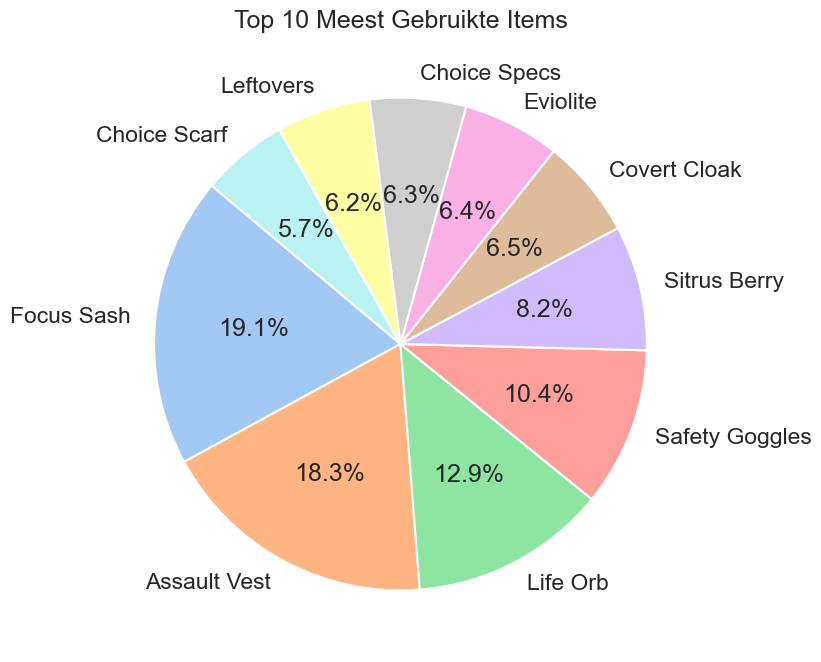

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# Visualisatie: Top 10 Verhouding van Items
plt.figure(figsize=(8, 8))
# Bereken de frequenties en pak de top 10 meest gebruikte items
item_counts_top10 = details_df['item'].value_counts().dropna().head(10)
plt.pie(item_counts_top10, labels=item_counts_top10.index, autopct="%1.1f%%", startangle=140, 
        colors=sns.color_palette("pastel", len(item_counts_top10)))
plt.title("Top 10 Meest Gebruikte Items")
plt.show()


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Vergelijken van de dataframes om te checken of alles klopt</strong>
</div>


c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


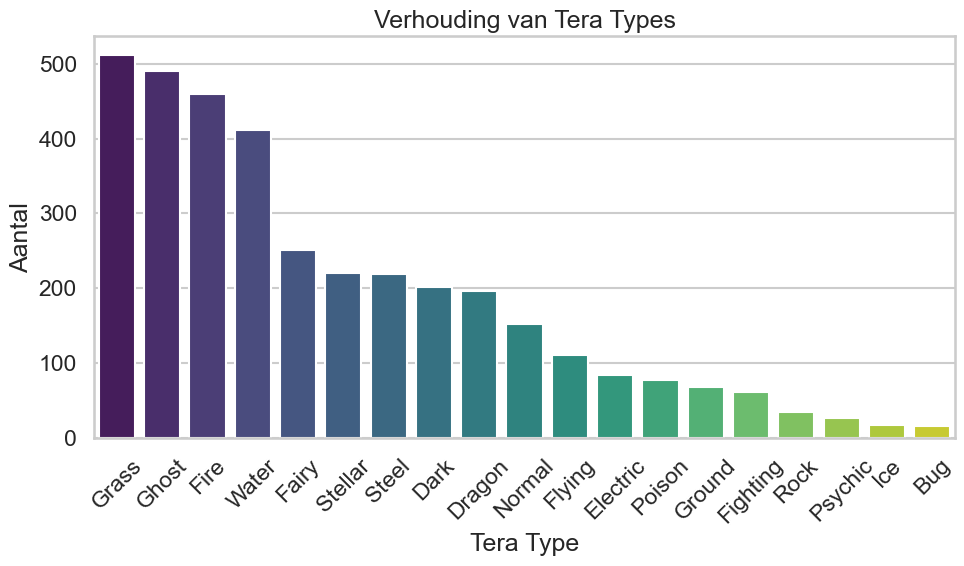

In [11]:
plt.figure(figsize=(10, 6))  # Grotere breedte voor de bar chart
tera_counts = details_df['tera_type'].value_counts().dropna()
sns.barplot(x=tera_counts.index, y=tera_counts.values, palette="viridis")
plt.title("Verhouding van Tera Types")
plt.xlabel("Tera Type")
plt.ylabel("Aantal")
plt.xticks(rotation=45)  # Roteer de labels zodat ze goed leesbaar zijn
plt.tight_layout()
plt.show()

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Vergelijken van de dataframes om te checken of alles klopt</strong>
</div>


c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rogie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


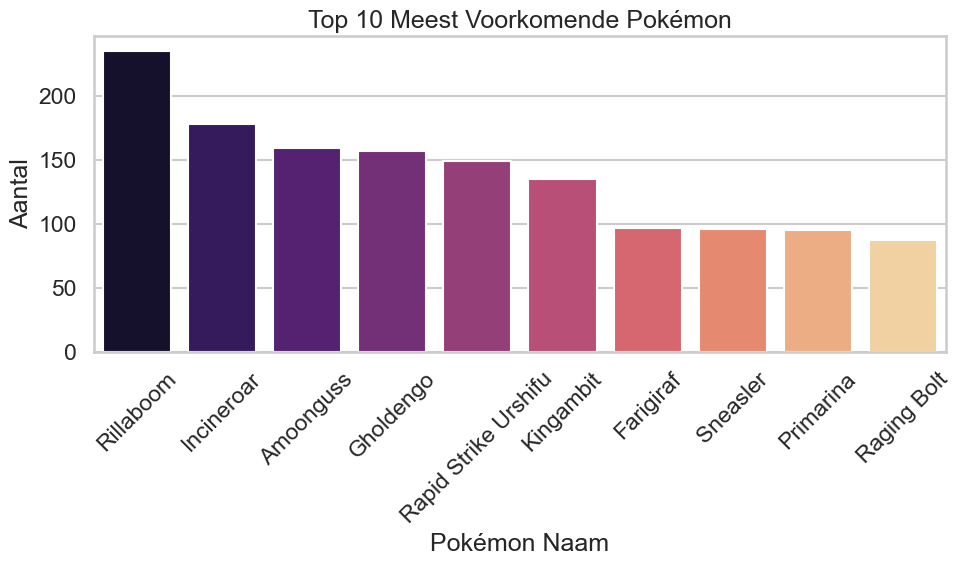

In [12]:
plt.figure(figsize=(10, 6))
pokemon_counts = details_df['pokemon_name'].value_counts().dropna().head(10)
sns.barplot(x=pokemon_counts.index, y=pokemon_counts.values, palette="magma")
plt.title("Top 10 Meest Voorkomende Pokémon")
plt.xlabel("Pokémon Naam")
plt.ylabel("Aantal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Scrapen van de Detail pagina per Pokemon</strong></h2>
</div>


In [21]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

class PokemonDetailScraper:
    """
    Scraper voor het extraheren van gedetailleerde informatie van een Pokémon-pagina.
    
    Met behulp van de unieke pokemon_link halen we:
      - De infobox-statistieken (zoals Totals, PTS, Top 8 count, etc.).
      - De tabel met Team Partners (welke Pokémon vaak samen voorkomen).
      - De tabel met Items (welke items vaak gebruikt worden).
      - De flex-row met drie tabellen: Attacks, Tera Types en Abilities (elk met gebruikspercentages).
    """
    
    def __init__(self, base_url="https://limitlessvgc.com"):
        """
        Initialiseert de PokemonDetailScraper.
        
        Parameters:
            base_url (str): De basis-URL van de website (standaard "https://limitlessvgc.com").
        """
        self.base_url = base_url
        # Gebruik een dictionary om per pokemon_link de gescrapete data op te slaan
        self.data = {}
    
    def scrape_pokemon(self, pokemon_link):
        """
        Haalt de detailpagina van een Pokémon op en extraheert de gewenste informatie.
        
        Parameters:
            pokemon_link (str): De URL naar de Pokémon-detailpagina.
        """
        # Voorkom dubbele requests: als de link al gescrapet is, doe niets.
        if pokemon_link in self.data:
            return
        
        try:
            response = requests.get(pokemon_link)
            response.raise_for_status()
        except requests.RequestException as e:
            print(f"Fout bij het ophalen van {pokemon_link}: {e}")
            return
        
        soup = BeautifulSoup(response.text, "html.parser")
        
        # --- 1. Infobox-statistieken ---
        infobox = soup.find("div", class_="infobox-content")
        if infobox:
            heading_div = infobox.find("div", class_="infobox-heading")
            infobox_heading = heading_div.text.strip() if heading_div else None
            text_div = infobox.find("div", class_="infobox-text")
            # Verzamel alle regels (p-tags) als één lijst met tekst
            infobox_lines = [p.get_text(separator=" ", strip=True) for p in text_div.find_all("p")] if text_div else []
        else:
            infobox_heading = None
            infobox_lines = []
        
        # --- 2. Team Partners en Items (uit de flex-50 boxen) ---
        team_partners = []
        items = []
        for div in soup.find_all("div", class_="pokemon-stats-box flex-50"):
            header = div.find("th")
            if header:
                header_text = header.get_text(strip=True)
                table = div.find("table")
                if not table: 
                    continue
                tbody = table.find("tbody")
                if not tbody:
                    continue
                rows = tbody.find_all("tr")
                if "Team Partners" in header_text:
                    for row in rows:
                        cols = row.find_all("td")
                        if len(cols) >= 4:
                            rank = cols[0].text.strip()
                            partner_a = cols[2].find("a")
                            partner_name = partner_a.text.strip() if partner_a else cols[2].text.strip()
                            partner_link = urljoin(self.base_url, partner_a["href"]) if partner_a and "href" in partner_a.attrs else None
                            usage = cols[3].text.strip()
                            team_partners.append({
                                "rank": rank,
                                "partner_name": partner_name,
                                "partner_link": partner_link,
                                "usage": usage
                            })
                elif "Items" in header_text:
                    for row in rows:
                        cols = row.find_all("td")
                        if len(cols) >= 4:
                            rank = cols[0].text.strip()
                            item_name = cols[2].text.strip()
                            usage = cols[3].text.strip()
                            items.append({
                                "rank": rank,
                                "item": item_name,
                                "usage": usage
                            })
        
        # --- 3. Attacks, Tera Types en Abilities (uit de flex-row) ---
        attacks = []
        tera_types = []
        abilities = []
        flex_row = soup.find("div", class_="flex-row")
        if flex_row:
            for box in flex_row.find_all("div", class_="pokemon-stats-box flex-33"):
                header = box.find("th")
                if not header:
                    continue
                header_text = header.get_text(strip=True)
                table = box.find("table")
                if not table:
                    continue
                tbody = table.find("tbody")
                if not tbody:
                    continue
                rows = tbody.find_all("tr")
                if "Attacks" in header_text:
                    for row in rows:
                        cols = row.find_all("td")
                        if len(cols) >= 3:
                            rank = cols[0].text.strip()
                            attack = cols[1].text.strip()
                            usage = cols[2].text.strip()
                            attacks.append({
                                "rank": rank,
                                "attack": attack,
                                "usage": usage
                            })
                elif "Tera Types" in header_text:
                    for row in rows:
                        cols = row.find_all("td")
                        if len(cols) >= 3:
                            rank = cols[0].text.strip()
                            tera = cols[1].text.strip()
                            usage = cols[2].text.strip()
                            tera_types.append({
                                "rank": rank,
                                "tera_type": tera,
                                "usage": usage
                            })
                elif "Abilities" in header_text:
                    for row in rows:
                        cols = row.find_all("td")
                        if len(cols) >= 3:
                            rank = cols[0].text.strip()
                            ability = cols[1].text.strip()
                            usage = cols[2].text.strip()
                            abilities.append({
                                "rank": rank,
                                "ability": ability,
                                "usage": usage
                            })
        
        # Sla alle gegevens op in de data-dictionary, gekoppeld aan de pokemon_link.
        self.data[pokemon_link] = {
            "infobox_heading": infobox_heading,
            "infobox_lines": infobox_lines,
            "team_partners": team_partners,
            "items": items,
            "attacks": attacks,
            "tera_types": tera_types,
            "abilities": abilities
        }
        
    
    def get_data(self):
        """
        Retourneert de gescrapete gegevens.
        
        Returns:
            Een dictionary waarbij de key de pokemon_link is en de value de gescrapete details.
        """
        return self.data


In [22]:
import pandas as pd
from IPython.display import display

# Stel dat je de data van de scraper hebt:
pokemon_details = {}  # Dit wordt gevuld door de PokemonDetailScraper
# Bijvoorbeeld:
unique_pokemon_links = details_df['pokemon_link'].dropna().unique()
pokemon_scraper = PokemonDetailScraper()
for link in unique_pokemon_links:
    pokemon_scraper.scrape_pokemon(link)
pokemon_details = pokemon_scraper.get_data()

# Maak lege lijsten voor de verschillende categorieën
general_data = []
team_partners_data = []
items_data = []
attacks_data = []
tera_types_data = []
abilities_data = []

# Loop over de gescrapete data en vul de lijsten
for link, details in pokemon_details.items():
    # Algemene gegevens
    general_data.append({
        "pokemon_link": link,
        "pokemon_name": details.get("infobox_heading"),
        "infobox_details": " | ".join(details.get("infobox_lines", []))
    })
    
    # Team Partners
    for partner in details.get("team_partners", []):
        partner_entry = partner.copy()
        partner_entry["pokemon_link"] = link
        team_partners_data.append(partner_entry)
    
    # Items
    for item in details.get("items", []):
        item_entry = item.copy()
        item_entry["pokemon_link"] = link
        items_data.append(item_entry)
    
    # Attacks
    for attack in details.get("attacks", []):
        attack_entry = attack.copy()
        attack_entry["pokemon_link"] = link
        attacks_data.append(attack_entry)
    
    # Tera Types
    for tera in details.get("tera_types", []):
        tera_entry = tera.copy()
        tera_entry["pokemon_link"] = link
        tera_types_data.append(tera_entry)
    
    # Abilities
    for ability in details.get("abilities", []):
        ability_entry = ability.copy()
        ability_entry["pokemon_link"] = link
        abilities_data.append(ability_entry)

# Zet de lijsten om in DataFrames
df_general = pd.DataFrame(general_data)
df_team_partners = pd.DataFrame(team_partners_data)
df_items = pd.DataFrame(items_data)
df_attacks = pd.DataFrame(attacks_data)
df_tera_types = pd.DataFrame(tera_types_data)
df_abilities = pd.DataFrame(abilities_data)

# Display de DataFrames (bijvoorbeeld in een Jupyter Notebook)
display(df_general)
display(df_team_partners)
display(df_items)
display(df_attacks)
display(df_tera_types)
display(df_abilities)


Fout bij het ophalen van https://limitlessvgc.com/pokemon/entei: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Fout bij het ophalen van https://limitlessvgc.com/pokemon/urshifu: HTTPSConnectionPool(host='limitlessvgc.com', port=443): Max retries exceeded with url: /pokemon/urshifu (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001ED14BFB910>: Failed to resolve 'limitlessvgc.com' ([Errno 11001] getaddrinfo failed)"))
Fout bij het ophalen van https://limitlessvgc.com/pokemon/ogerpon-wellspring: HTTPSConnectionPool(host='limitlessvgc.com', port=443): Max retries exceeded with url: /pokemon/ogerpon-wellspring (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001ED11B71060>: Failed to resolve 'limitlessvgc.com' ([Errno 11001] getaddrinfo failed)"))
Fout bij het ophalen van https://limitlessvgc.com/pokemon/chi-yu: HTTPSConnectionPool(host='limitlessvgc.com', port=443): Max retr

,pokemon_link,pokemon_name,infobox_details
0,https://limitlessvgc.com/pokemon/garchomp,Garchomp,"Totals: 185,000 | 5183 PTS | Top 8 count: | Re..."
1,https://limitlessvgc.com/pokemon/dragonite,Dragonite,"Totals: 245,500 | 4459 PTS | Top 8 count: | Re..."
2,https://limitlessvgc.com/pokemon/amoonguss,Amoonguss,"Totals: 714,500 | 14139 PTS | Top 8 count: | R..."
3,https://limitlessvgc.com/pokemon/incineroar,Incineroar,"Totals: 913,750 | 15726 PTS | Top 8 count: | R..."
4,https://limitlessvgc.com/pokemon/ninetales-alola,Alolan Ninetales,"Totals: 79,250 | 1726 PTS | Top 8 count: | Reg..."
...,...,...,...
117,https://limitlessvgc.com/pokemon/iron-valiant,Iron Valiant,"Totals: 20,250 | 87 PTS | Top 8 count: | Regio..."
118,https://limitlessvgc.com/pokemon/calyrex-ice,Ice Rider Calyrex,"Totals: 124,750 | 1321 PTS | Top 8 count: | Re..."
119,https://limitlessvgc.com/pokemon/flutter-mane,Flutter Mane,"Totals: 665,250 | 12172 PTS | Top 8 count: | R..."
120,https://limitlessvgc.com/pokemon/chien-pao,Chien-Pao,"Totals: 303,000 | 4626 PTS | Top 8 count: | Re..."


,rank,partner_name,partner_link,usage,pokemon_link
0,1,Gholdengo,https://limitlessvgc.com/pokemon/gholdengo,52.56%,https://limitlessvgc.com/pokemon/garchomp
1,2,Incineroar,https://limitlessvgc.com/pokemon/incineroar,43.59%,https://limitlessvgc.com/pokemon/garchomp
2,3,Amoonguss,https://limitlessvgc.com/pokemon/amoonguss,36.54%,https://limitlessvgc.com/pokemon/garchomp
3,4,Kingambit,https://limitlessvgc.com/pokemon/kingambit,35.26%,https://limitlessvgc.com/pokemon/garchomp
4,5,Sneasler,https://limitlessvgc.com/pokemon/sneasler,30.77%,https://limitlessvgc.com/pokemon/garchomp
...,...,...,...,...,...
3788,37,Thundurus,https://limitlessvgc.com/pokemon/thundurus,0.85%,https://limitlessvgc.com/pokemon/zamazenta
3789,37,Gothitelle,https://limitlessvgc.com/pokemon/gothitelle,0.85%,https://limitlessvgc.com/pokemon/zamazenta
3790,37,Suicune,https://limitlessvgc.com/pokemon/suicune,0.85%,https://limitlessvgc.com/pokemon/zamazenta
3791,37,Mandibuzz,https://limitlessvgc.com/pokemon/mandibuzz,0.85%,https://limitlessvgc.com/pokemon/zamazenta


,rank,item,usage,pokemon_link
0,1,Life Orb,79.31%,https://limitlessvgc.com/pokemon/garchomp
1,2,Clear Amulet,15.52%,https://limitlessvgc.com/pokemon/garchomp
2,3,Choice Band,5.17%,https://limitlessvgc.com/pokemon/garchomp
3,1,Choice Band,35.56%,https://limitlessvgc.com/pokemon/dragonite
4,2,Assault Vest,28.89%,https://limitlessvgc.com/pokemon/dragonite
...,...,...,...,...
282,2,Focus Sash,19.44%,https://limitlessvgc.com/pokemon/flutter-mane
283,3,Life Orb,5.56%,https://limitlessvgc.com/pokemon/flutter-mane
284,4,Choice Specs,2.78%,https://limitlessvgc.com/pokemon/flutter-mane
285,1,Focus Sash,100.00%,https://limitlessvgc.com/pokemon/chien-pao


""


""


""
